<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sample-Usecase-Description" data-toc-modified-id="Sample-Usecase-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sample Usecase Description</a></span><ul class="toc-item"><li><span><a href="#Description-of-columns-present-in-the-datset" data-toc-modified-id="Description-of-columns-present-in-the-datset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Description of columns present in the datset</a></span></li></ul></li><li><span><a href="#Import-necessary-libraries" data-toc-modified-id="Import-necessary-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import necessary libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Univariate-analysis-of-continuous-numeric-variables" data-toc-modified-id="Univariate-analysis-of-continuous-numeric-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Univariate analysis of continuous numeric variables</a></span><ul class="toc-item"><li><span><a href="#Distribution-plots" data-toc-modified-id="Distribution-plots-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Distribution plots</a></span></li><li><span><a href="#Count-Plots" data-toc-modified-id="Count-Plots-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Count Plots</a></span></li></ul></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation Analysis</a></span></li></ul></div>

### Sample Usecase Description
---
**Marketing Campaign Response Prediction**
- The Bank executed a campaign to cross-sell Personal Loans. As part of their Pilot Campaign, 20000 customers were sent campaigns through email, sms, and direct mail. They were given an offer of Personal Loan at an attractive interest rate of 12% and processing fee waived off if they respond within 1 Month. 2512 customer expressed their interest and are marked as Target = 1 Many Demographics and Behavioral variables provided.
---
- The aim is to build a `Machine Learning model` which can `predict the probability that a customer will respond to the campaign`.

#### Description of columns present in the datset

- CUST_ID	Customer ID - Unique ID
- TARGET	Target Field - 1: Responder, 0: Non-Responder
- AGE	Age of the customer in years
- GENDER	Gender
- BALANCE	Average Monthly Balance
- OCCUPATION	Occupation
- AGE_BKT	Age Bucket
- SCR	Generic Marketing Score
- HOLDING_PERIOD	Ability to hold money in the account (Range 0 - 31)
- ACC_TYPE	Account Type - Saving / Current
- ACC_OP_DATE	Account Open Date
- LEN_OF_RLTN_IN_MNTH	Length of Relationship in Months
- NO_OF_L_CR_TXNS	No. of Credit Transactions
- NO_OF_L_DR_TXNS	No. of Debit Transactions
- TOT_NO_OF_L_TXNS	Total No. of Transaction
- NO_OF_BR_CSH_WDL_DR_TXNS	No. of Branch Cash Withdrawal Transactions
- NO_OF_ATM_DR_TXNS	No. of ATM Debit Transactions
- NO_OF_NET_DR_TXNS	No. of Net Debit Transactions
- NO_OF_MOB_DR_TXNS	No. of Mobile Banking Debit Transactions
- NO_OF_CHQ_DR_TXNS	No. of Cheque Debit Transactions
- FLG_HAS_CC	Has Credit Card - 1: Yes, 0: No
- AMT_ATM_DR	Amount Withdrawn from ATM
- AMT_BR_CSH_WDL_DR	Amount cash withdrawn from Branch 
- AMT_CHQ_DR	Amount debited by Cheque Transactions
- AMT_NET_DR	Amount debited by Net Transactions
- AMT_MOB_DR	Amount debited by Mobile Banking Transactions
- AMT_L_DR	Total Amount Debited
- FLG_HAS_ANY_CHGS	Has any banking charges
- AMT_OTH_BK_ATM_USG_CHGS	Amount charged by way of the Other Bank ATM usage
- AMT_MIN_BAL_NMC_CHGS	Amount charged by way Minimum Balance not maintained
- NO_OF_IW_CHQ_BNC_TXNS	Amount charged by way Inward Cheque Bounce
- NO_OF_OW_CHQ_BNC_TXNS	Amount charged by way Outward Cheque Bounce
- AVG_AMT_PER_ATM_TXN	Avg. Amt withdrawn per ATM Transaction
- AVG_AMT_PER_CSH_WDL_TXN	Avg. Amt withdrawn per Cash Withdrawal Transaction
- AVG_AMT_PER_CHQ_TXN	Avg. Amt debited per Cheque Transaction
- AVG_AMT_PER_NET_TXN	Avg. Amt debited per Net Transaction
- AVG_AMT_PER_MOB_TXN	Avg. Amt debited per Mobile Banking Transaction
- FLG_HAS_NOMINEE	Has Nominee - 1: Yes, 0: No
- FLG_HAS_OLD_LOAN	Has any earlier loan - 1: Yes, 0: No
- random	Random Number


### Import necessary libraries

In [11]:
import sys 
print('This notebook was created using Python : ' + sys.version)

This notebook was created using Python : 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]


In [12]:
import findspark
findspark.init()

In [45]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

In [14]:
#get the spark session
spark = SparkSession.builder.getOrCreate()

In [15]:
spark

### Load the data 

In [16]:
# File location and type
file_location = "PL_XSELL.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)
df.limit(10).toPandas().head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,...,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,C7927,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,...,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1,0.000011
1,C6877,0,47,M,287489.04,SAL,46-50,324,28,SA,...,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0,0.000111
2,C19922,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,...,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1,0.000120
3,C8183,0,53,M,71720.48,SAL,>50,196,13,CA,...,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0,0.000137
4,C12123,0,36,M,1671622.89,PROF,36-40,167,24,SA,...,0,0,0.0,808480.0,0.0,0.00,0.0,1,0,0.000174


In [17]:
#get summary statistics
df.describe().toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
CUST_ID,20000,None,None,C1,C9999
TARGET,20000,0.1256,0.3314062937039292,0,1
AGE,20000,38.41815,9.577984520078992,21,55
GENDER,20000,None,None,F,O
BALANCE,20000,511362.1921180006,723592.9617916108,0.0,8360430.57
OCCUPATION,20000,None,None,PROF,SENP
AGE_BKT,20000,None,None,26-30,>50
SCR,20000,440.1503,249.88758232473265,100,999
HOLDING_PERIOD,20000,14.95565,8.642633732456305,1,31


### Univariate analysis of continuous numeric variables

In [18]:
df.printSchema()

root
 |-- CUST_ID: string (nullable = true)
 |-- TARGET: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- GENDER: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- OCCUPATION: string (nullable = true)
 |-- AGE_BKT: string (nullable = true)
 |-- SCR: integer (nullable = true)
 |-- HOLDING_PERIOD: integer (nullable = true)
 |-- ACC_TYPE: string (nullable = true)
 |-- ACC_OP_DATE: string (nullable = true)
 |-- LEN_OF_RLTN_IN_MNTH: integer (nullable = true)
 |-- NO_OF_L_CR_TXNS: integer (nullable = true)
 |-- NO_OF_L_DR_TXNS: integer (nullable = true)
 |-- TOT_NO_OF_L_TXNS: integer (nullable = true)
 |-- NO_OF_BR_CSH_WDL_DR_TXNS: integer (nullable = true)
 |-- NO_OF_ATM_DR_TXNS: integer (nullable = true)
 |-- NO_OF_NET_DR_TXNS: integer (nullable = true)
 |-- NO_OF_MOB_DR_TXNS: integer (nullable = true)
 |-- NO_OF_CHQ_DR_TXNS: integer (nullable = true)
 |-- FLG_HAS_CC: integer (nullable = true)
 |-- AMT_ATM_DR: integer (nullable = true)
 |-- AMT_BR_CSH_W

In [19]:
#getting the numeric columns
num_columns = [col[0] for col in df.dtypes if (col[1] == 'int' or col[1] == 'double') and not('FLG' in col[0])]
num_columns.remove('random')

#### Distribution plots

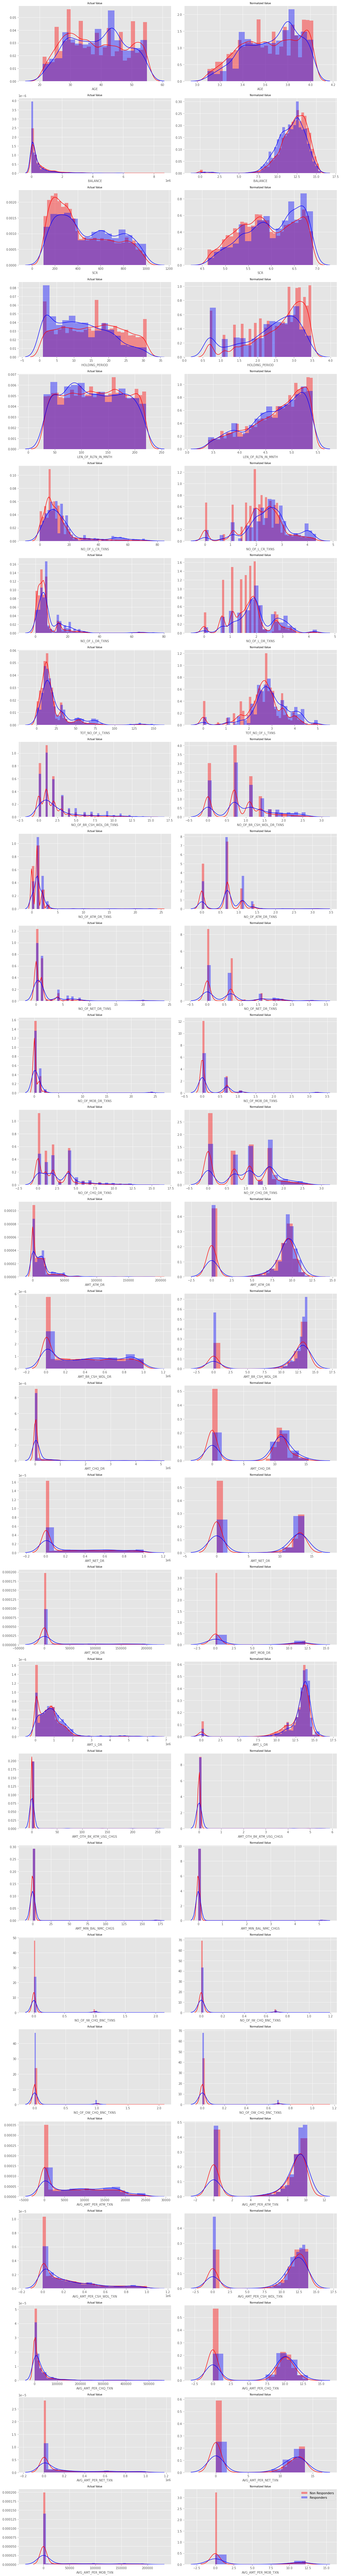

In [20]:
#function to plot distribution by 
fig, ax = plt.subplots(28,2, figsize = (16,120))
def plot_hist(col,i,target_col = 'TARGET'):
    v1 = np.array(df.filter(target_col + "= 0").select(col).collect())
    v2 = np.array(df.filter(target_col + "= 1").select(col).collect())
    p1 = sns.distplot(v1,color = 'r', ax = ax[i,0])
    p2 = sns.distplot(v2,color = 'b', ax = ax[i,0])
    ax[i,0].set_title('Actual Value',fontsize = 8)
    ax[i,0].set_xlabel(col,fontsize = 10)
    p1 = sns.distplot(np.log1p(v1),color = 'r', ax = ax[i,1])
    p2 = sns.distplot(np.log1p(v2),color = 'b', ax = ax[i,1])
    ax[i,1].set_xlabel(col,fontsize = 10)
    ax[i,1].set_title('Normalized Value',fontsize = 8)
    plt.legend(('Non Responders','Responders'),)
    #fig.suptitle('Univariate analysis of '+ col + ' column')
    plt.subplots_adjust(top = 0.9, bottom = 0.1)
    plt.tight_layout()
for i in range(len(num_columns)-1):
    plot_hist(num_columns[i+1],i)
plt.show()

#### Count Plots 

In [21]:
#Grouping the data for plots
countbyoccup = df.groupby(['occupation','target']).count().toPandas()
countbygender = df.groupby(['gender','target']).count().toPandas()
countbyagebkt = df.groupby(['age_bkt','target']).count().toPandas()
countbyacctype = df.groupby(['acc_type','target']).count().toPandas()
countbyhascc = df.groupby(['flg_has_cc','target']).count().toPandas()
countbyhasnominee = df.groupby(['flg_has_nominee','target']).count().toPandas()
countbyhasoldloan = df.groupby(['flg_has_old_loan','target']).count().toPandas()

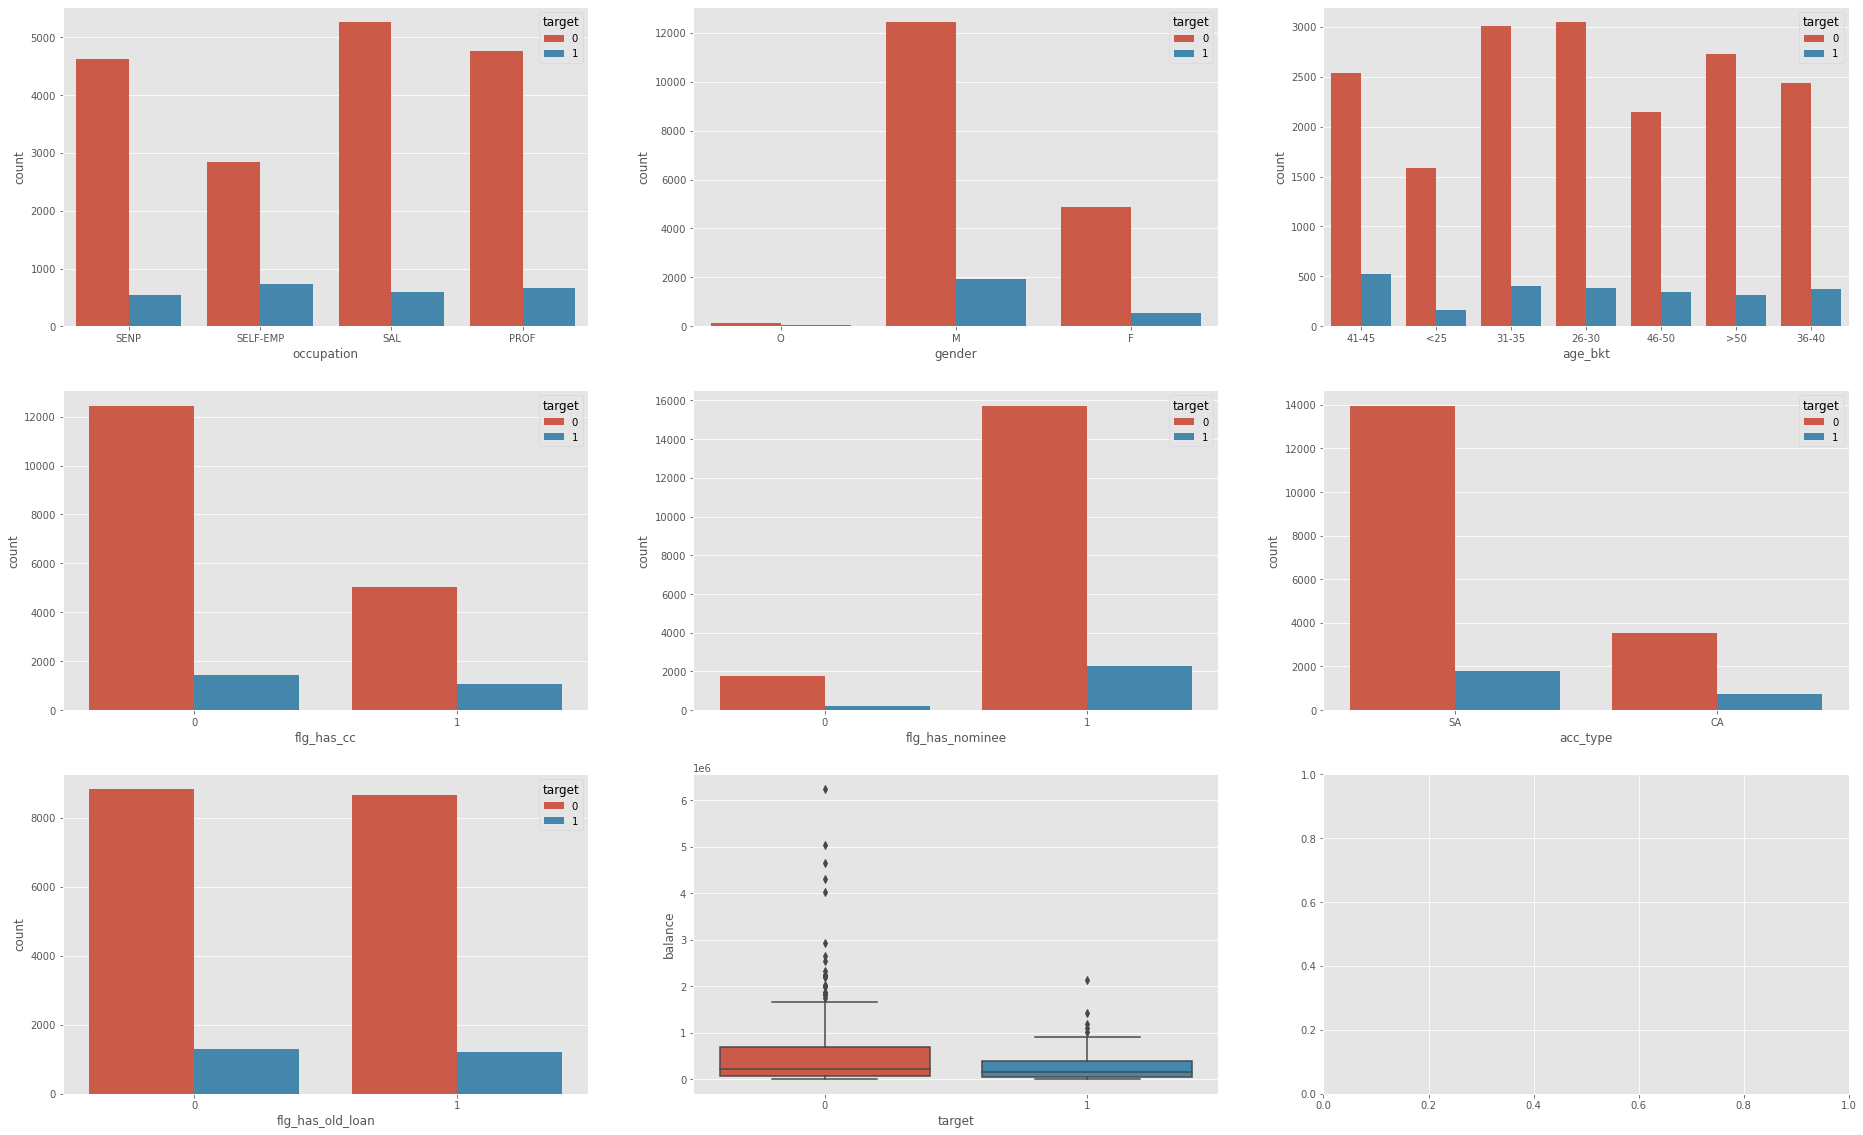

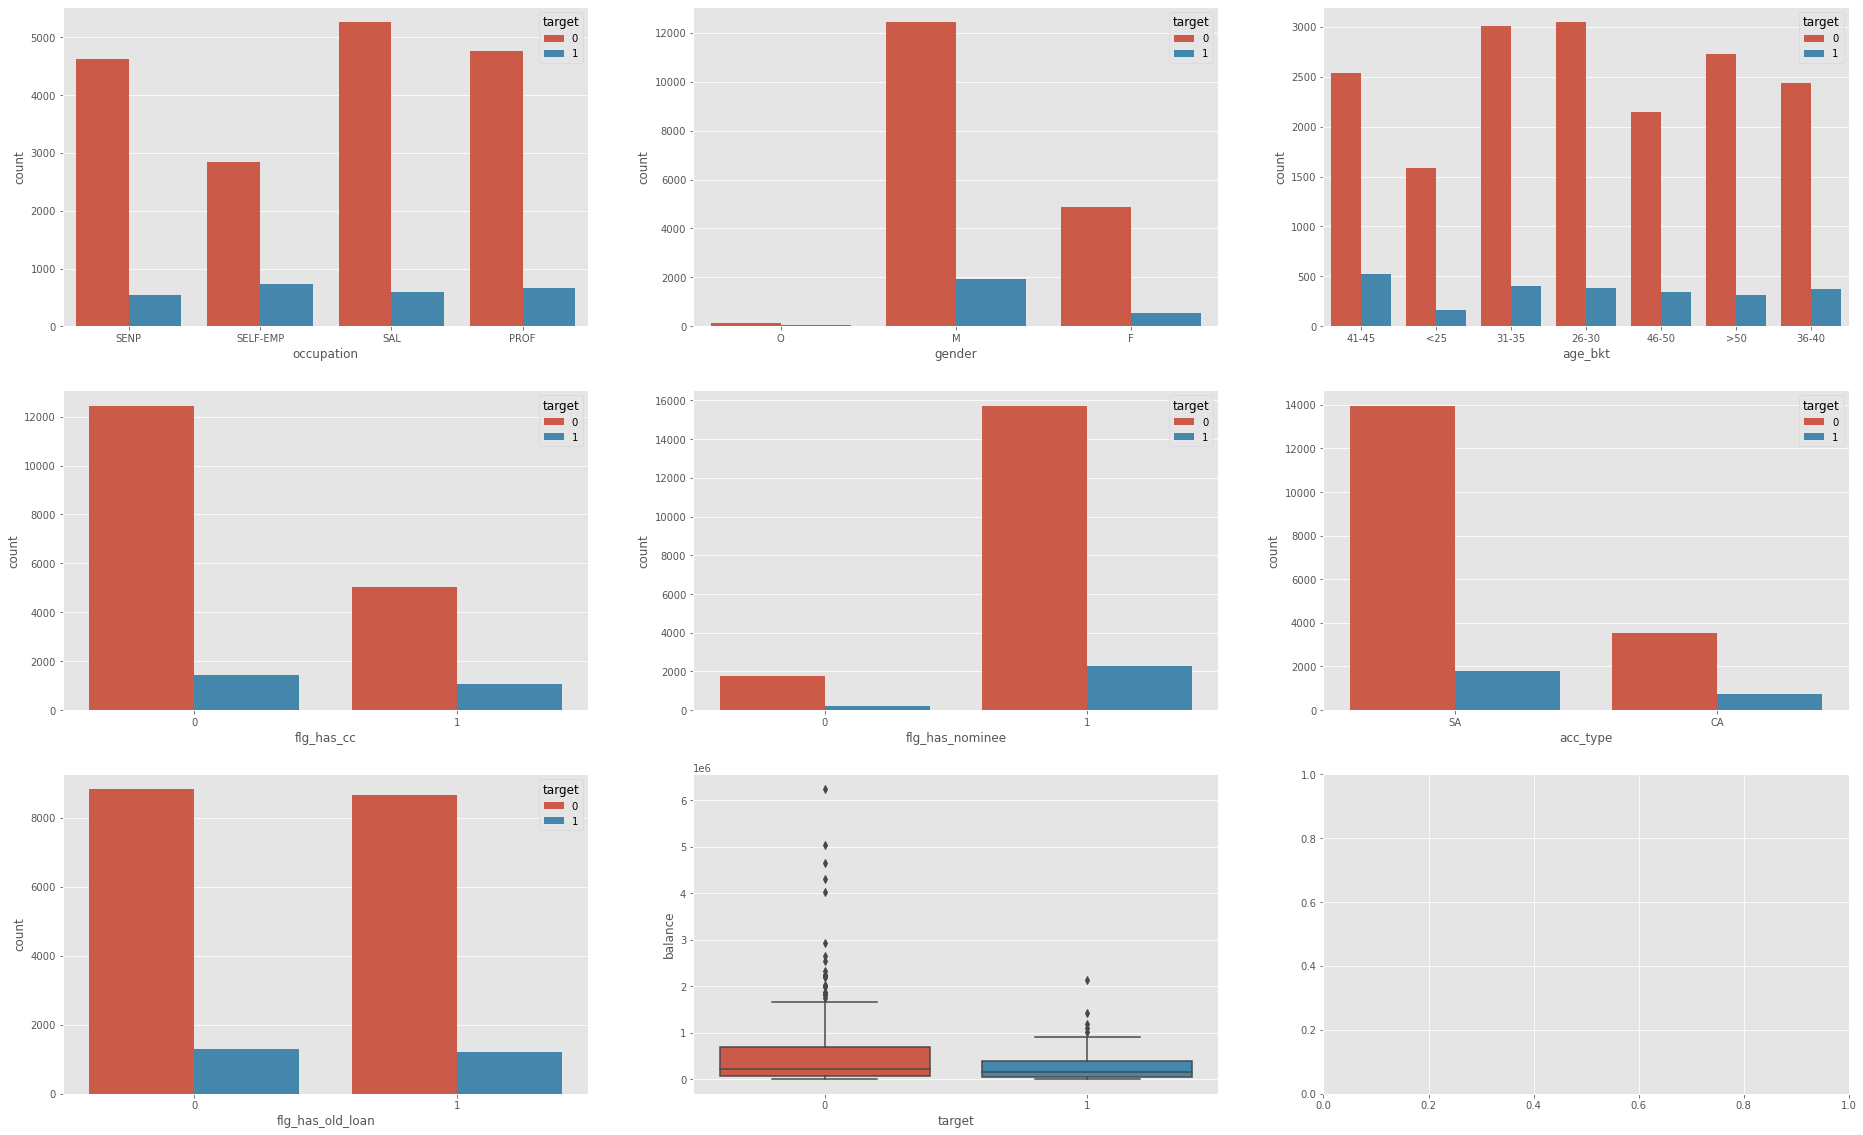

In [44]:
plotdata = df.sample(0.02).select(['balance','target']).toPandas()
fig,ax = plt.subplots(3,3, figsize = (32,20))
sns.barplot(countbyoccup['occupation'],countbyoccup['count'],hue= countbyoccup['target'],ax =ax[0,0],)
sns.barplot(countbygender['gender'],countbygender['count'],hue= countbygender['target'],ax =ax[0,1])
sns.barplot(countbyagebkt['age_bkt'],countbyagebkt['count'],hue= countbyagebkt['target'],ax =ax[0,2])
sns.barplot(countbyhascc['flg_has_cc'],countbyhascc['count'],hue= countbyhascc['target'],ax =ax[1,0])
sns.barplot(countbyhasnominee['flg_has_nominee'],countbyhasnominee['count'],hue= countbyhasnominee['target'],ax =ax[1,1])
sns.barplot(countbyacctype['acc_type'],countbyacctype['count'],hue= countbyacctype['target'],ax =ax[1,2])
sns.barplot(countbyhasoldloan['flg_has_old_loan'],countbyhasoldloan['count'],hue= countbyhasoldloan['target'],ax =ax[2,0])
sns.boxplot(x = 'target', y ='balance',data = plotdata, ax = ax[2,1])
display(fig)

### Correlation Analysis

In [60]:
df_numeric = df.select(num_columns)
# convert to vector column first
num_columns = [col[0] for col in df.dtypes if (col[1] == 'int' or col[1] == 'double')]
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df_numeric.columns, outputCol=vector_col)
df_vector = assembler.transform(df_numeric).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col,method = 'spearman')

In [62]:
#assembled vectors to dataframe
corr_df = pd.DataFrame(matrix.collect()[0]["spearman({})".format(vector_col)].values.reshape(29,29),index = df_numeric.columns, columns = df_numeric.columns)
corr_df.style.background_gradient(cmap='RdBu_r').set_precision(2)

,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN
TARGET,1.00,0.02,-0.09,0.08,-0.14,-0.02,0.11,0.14,0.12,0.08,0.11,0.09,0.08,0.11,0.09,0.05,0.09,0.07,0.09,0.09,0.03,0.01,0.01,0.03,0.08,0.01,0.08,0.05,0.09
AGE,0.02,1.00,-0.15,-0.00,-0.01,-0.01,0.02,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.02,0.02,-0.01,0.02,-0.01,-0.01,0.02,-0.00,0.01,0.01,0.02
BALANCE,-0.09,-0.15,1.00,-0.08,0.04,-0.00,-0.04,-0.06,-0.05,-0.05,-0.06,-0.07,-0.04,-0.04,-0.05,-0.02,-0.04,-0.05,-0.04,-0.05,-0.02,-0.15,-0.01,-0.01,-0.05,0.00,-0.04,-0.04,-0.04
SCR,0.08,-0.00,-0.08,1.00,-0.03,0.01,-0.01,0.02,-0.00,0.00,0.02,0.02,-0.01,0.02,0.02,-0.02,0.01,0.02,-0.01,0.01,0.01,0.01,-0.00,0.00,0.02,-0.03,0.01,0.02,-0.01
HOLDING_PERIOD,-0.14,-0.01,0.04,-0.03,1.00,0.01,-0.01,-0.50,-0.15,-0.15,-0.24,-0.27,-0.13,-0.58,-0.22,-0.05,-0.44,-0.23,-0.12,-0.22,-0.08,-0.01,-0.04,-0.07,-0.20,0.03,-0.39,-0.19,-0.12
LEN_OF_RLTN_IN_MNTH,-0.02,-0.01,-0.00,0.01,0.01,1.00,0.02,0.00,0.02,-0.01,0.01,0.01,0.01,0.00,-0.01,-0.00,-0.00,0.00,0.00,0.01,-0.00,-0.01,0.00,0.00,-0.01,0.01,-0.00,0.00,0.00
NO_OF_L_CR_TXNS,0.11,0.02,-0.04,-0.01,-0.01,0.02,1.00,0.52,0.97,0.40,0.53,0.40,0.52,0.26,0.44,0.17,0.27,0.28,0.51,0.40,0.14,0.01,0.01,0.04,0.35,0.02,0.24,0.19,0.51
NO_OF_L_DR_TXNS,0.14,0.03,-0.06,0.02,-0.50,0.00,0.52,1.00,0.69,0.57,0.75,0.61,0.54,0.77,0.66,0.28,0.63,0.49,0.53,0.61,0.15,0.01,0.10,0.10,0.59,0.07,0.56,0.41,0.52
TOT_NO_OF_L_TXNS,0.12,0.03,-0.05,-0.00,-0.15,0.02,0.97,0.69,1.00,0.47,0.63,0.48,0.57,0.42,0.53,0.21,0.39,0.36,0.56,0.48,0.14,0.01,0.04,0.06,0.44,0.03,0.34,0.26,0.55
NO_OF_BR_CSH_WDL_DR_TXNS,0.08,0.03,-0.05,0.00,-0.15,-0.01,0.40,0.57,0.47,1.00,0.35,0.33,0.38,0.13,0.28,0.58,0.08,0.25,0.38,0.53,-0.05,0.02,0.05,0.05,0.23,0.31,0.08,0.19,0.38


In [68]:
# get a boolean dataframe where true means that a pair of variables is highly correlated
highly_correlated_df = (abs(corr_df) > .9) & (corr_df < 1.0)
# get the names of the variables so we can use them to slice the dataframe
correlated_vars_index = (highly_correlated_df==True).any()
correlated_var_names = correlated_vars_index[correlated_vars_index==True].index
# slice it
highly_correlated_df.loc[correlated_var_names,correlated_var_names].columns

Index(['NO_OF_L_CR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_MOB_DR_TXNS',
       'AMT_ATM_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR',
       'AVG_AMT_PER_ATM_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN'],
      dtype='object')

 `We have identified few highly correlated features :`
 - NO_OF_L_CR_TXNS
 - TOT_NO_OF_L_TXNS
 - NO_OF_MOB_DR_TXNS
 - AMT_ATM_DR
 - AMT_CHQ_DR
 - AMT_NET_DR
 - AMT_MOB_DR
 - AVG_AMT_PER_ATM_TXN
 - AVG_AMT_PER_CHQ_TXN
 - AVG_AMT_PER_NET_TXN
 - AVG_AMT_PER_MOB_TXN

`We can drop these features from the dataset for further analysis.`